<a href="https://colab.research.google.com/github/xuyi0619/Past-work-of-statistical-analysis/blob/main/Copy_of_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import spacy as spy
import textblob as tb
import matplotlib.pyplot as plt
%matplotlib inline
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
import scipy as sp
import os
import re

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


1. Collect some texts.  Compare them in a number of ways.


I collected Google translate's and Chatgpt's translation of a Chinese novel-*Journey to the West* (one section in a chapter). I want to compare them to a formal translation of the novel I found online, and see how they are different from each other.

From reading the translations, I feel Chatgpt's version is easier to undestand than Google's version, but Google's version has more complex words than Chaptgpt's version. The formal translation is a mix of both. Like the version that Chatgpt provides, it is easy to generally easy to understand. The language it uses also has depth for further interpretation.

2.You will likely want to have them be “bags of words.”  Prepare the text through removing upper case, white space, punctuation, and consider stemming the words, if appropriate for you purpose.  

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp

In [ ]:
# create dictionary with keys being file name and values being the content of the speech

files = ["Google translate.txt", "chatgpt.txt", "formal English translation.txt"]
docs = {}
for d in files:
    file_path = '/content/' + str(d)
    with open(file_path, 'rb') as f:
        f = [f.read().decode('utf8', 'ignore').replace('\n', " ")]
        docs[d] = f

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

processed_docs = {}
for program, text in docs.items():
    # convert list to string
    text = ' '.join(text)

    # to lower case
    text = text.lower()


    # this would be the method to use if you want to remove all punctuations:
    import string
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # remove stopwords
    text = [word for word in text.split() if word not in stop]
    text = ' '.join(text)
    # stem document
    stemmed_text = [stemmer.stem(word) for word in text.split()]
    text = ' '.join(stemmed_text)

    processed_docs[program] = text



LookupError: ignored

In [ ]:
from shorttext.utils import standard_text_preprocessor_1
preprocessor1 = standard_text_preprocessor_1()
docids = sorted(processed_docs.keys())
addresses = [a for docid in docids for a in processed_docs[docid]]
corpus = [preprocessor1(a).split(' ') for a in addresses]
corpus = [[word for word in processed_docs[docid].split()] for docid in docids]
corpus = [[w for w in d if w not in ['', '\n', '\r\n', '\ufeff']] for d in corpus]

In [ ]:
print(corpus)

[['biao', 'sanzang', 'bid', 'farewel', 'king', 'zhu', 'zi', 'straighten', 'pommel', 'hors', 'march', 'westward', 'mani', 'mountain', 'plain', 'travel', 'endless', 'waterway', 'gone', 'fall', 'winter', 'pass', 'without', 'realiz', 'worth', 'beauti', 'spring', 'master', 'apprentic', 'outing', 'road', 'enjoy', 'sceneri', 'suddenli', 'saw', 'nunneri', 'sanzang', 'got', 'hors', 'stood', 'besid', 'road', 'travel', 'ask', 'master', 'road', 'smooth', 'innoc', 'dont', 'take', 'baji', 'said', 'brother', 'unsympathet', 'master', 'tire', 'sit', 'hors', 'let', 'come', 'close', 'windsanzang', 'said', 'guan', 'feng', 'think', 'someon', 'hous', 'want', 'eat', 'fast', 'walker', 'said', 'smile', 'see', 'master', 'said', 'want', 'eat', 'vegetarian', 'food', 'go', 'transform', 'say', 'goe', 'teacher', 'day', 'father', 'life', 'reason', 'discipl', 'sit', 'high', 'teacher', 'go', 'huazhai', 'sanzang', 'said', 'that', 'case', 'weekday', 'horizon', 'boundless', 'go', 'huazhai', 'matter', 'far', 'near', 'today

In [ ]:
!pip install shorttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 KB 15.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 27.5 MB/s eta 0:00:00
  Created wheel for shorttext: filename=shorttext-1.5.8-cp39-cp39-linux_x86_64.whl size=640368 sha256=1f80d1a413229f69468eead9776ce3a6001d32b9f5f1848c9eeb44ccec365575
  Stored in directory: /root/.cache/pip/wheels/37/5f/43/a53207fe4c9691f2fcfa

In [ ]:
print(docids)

['Google translate.txt', 'chatgpt.txt', 'formal English translation.txt']


In [ ]:
# Doesn't work, but don't delete it
from shorttext.utils import DocumentTermMatrix

dtm = DocumentTermMatrix(corpus, docids=docids)
print(dtm)
dtm_df = dtm.generate_dtm(corpus)

print(dtm_df)



None


In [ ]:
# Prepare bag of words. Uppercase, whitespace, and punctuation removed. Plus word stemming.
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
files = ["Google translate.txt", "chatgpt.txt", "formal English translation.txt"]
paperwords = []
for d in files:
    with open('/content/' + str(d) , encoding = 'latin1') as nf:
        lines = nf.readlines()

    i = 1
    for x in lines:
        words = x.split()
        for w in words:
          w = w.lower()
          w = w.strip()
          w = ps.stem(w)
          punctuation = ['.','.','!','"']
          for p in punctuation:
            w = w.replace(p,'')
          paperwords.append([d, i, w])

        i += 1

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
for word in paperwords: # iterate over word_list
  if word[2] in stop_words:
    paperwords.remove(word) # remove word from paperwords if it is a stopword

In [ ]:
# Relative word frequency
ppwords = pd.DataFrame(paperwords, columns = ['translation','count', 'word'])
ppwords = ppwords.iloc[:, ::-1]
ppwords

,word,count,translation
0,biao,1,Google translate.txt
1,sanzang,1,Google translate.txt
2,bid,1,Google translate.txt
3,farewel,1,Google translate.txt
4,king,1,Google translate.txt
...,...,...,...
2101,relax,2,formal English translation.txt
2102,they,2,formal English translation.txt
2103,end,2,formal English translation.txt
2104,their,2,formal English translation.txt


In [ ]:
pw = ppwords[['translation', 'word']]
d = pw.groupby(['translation', 'word']).size().reset_index(name='n')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object and fit it on the documents

vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(d['word'])
dtm_df = pd.DataFrame(dtm.todense(),
                      index=d['translation'],
                      columns=vectorizer.get_feature_names_out())
dtm_df

,72,999journey,abductee,abil,abl,about,abov,accept,across,admiration,...,younger,youngest,your,yu,zhang,zhen,zhengjian,zhou,zhu,zi
translation,,,,,,,,,,,,,,,,,,,,,
Google translate.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google translate.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google translate.txt,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google translate.txt,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Google translate.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
formal English translation.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
formal English translation.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
formal English translation.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_df = dtm_df.groupby(dtm_df.index).sum()
new_df

,72,999journey,abductee,abil,abl,about,abov,accept,across,admiration,...,younger,youngest,your,yu,zhang,zhen,zhengjian,zhou,zhu,zi
translation,,,,,,,,,,,,,,,,,,,,,
Google translate.txt,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,1,1
chatgpt.txt,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
formal English translation.txt,1,1,0,0,1,1,0,1,1,1,...,0,1,2,0,0,0,0,0,0,0


In [ ]:
dtm_T = new_df.T
dtm_T

translation,Google translate.txt,chatgpt.txt,formal English translation.txt
72,0,0,1
999journey,0,0,1
abductee,1,0,0
abil,1,0,0
abl,0,0,1
...,...,...,...
zhen,1,0,0
zhengjian,1,0,0
zhou,1,0,0
zhu,1,1,0


In [ ]:


# Allow words to be a column instead of the index
dtm_T.reset_index(drop=False, inplace=True)
dtm_T.rename(columns={'index': 'words'}, inplace=True)

dtm_T['Google'] = dtm_T['Google translate.txt'].apply(lambda x: x/dtm_T['Google translate.txt'].sum())
dtm_T['Chatgpt'] = dtm_T['chatgpt.txt'].apply(lambda x: x/dtm_T['chatgpt.txt'].sum())

dtm_T['Google_over_Chatgpt'] = dtm_T.Google - dtm_T.Chatgpt

dtm_T.sort_values('Google_over_Chatgpt', ascending=False, inplace=True)
dtm_T = dtm_T.rename_axis(None, axis = 1)
dtm_T.head(10)

,words,Google translate.txt,chatgpt.txt,formal English translation.txt,Google,Chatgpt,Google_over_Chatgpt
202,endless,2,0,1,0.004425,0.000000,0.004425
296,heel,2,0,1,0.004425,0.000000,0.004425
393,march,2,0,0,0.004425,0.000000,0.004425
48,bad,2,0,0,0.004425,0.000000,0.004425
224,fast,2,0,0,0.004425,0.000000,0.004425
439,nunnery,2,0,0,0.004425,0.000000,0.004425
322,huazhai,2,0,0,0.004425,0.000000,0.004425
525,said,3,1,2,0.006637,0.002222,0.004415
334,it,4,2,2,0.008850,0.004444,0.004405
673,through,1,0,0,0.002212,0.000000,0.002212


In [ ]:
dtm_T.sort_values('Google_over_Chatgpt', inplace=True)
dtm_T.head(10)

,words,Google translate.txt,chatgpt.txt,formal English translation.txt,Google,Chatgpt,Google_over_Chatgpt
136,clouds,0,3,0,0.000000,0.006667,-0.006667
244,food,1,3,1,0.002212,0.006667,-0.004454
366,lik,0,2,0,0.000000,0.004444,-0.004444
282,hair,0,2,1,0.000000,0.004444,-0.004444
300,helpless,0,2,0,0.000000,0.004444,-0.004444
234,fish,0,2,1,0.000000,0.004444,-0.004444
661,there,2,3,2,0.004425,0.006667,-0.002242
195,eat,1,2,1,0.002212,0.004444,-0.002232
484,powder,1,2,0,0.002212,0.004444,-0.002232
23,and,1,2,1,0.002212,0.004444,-0.002232


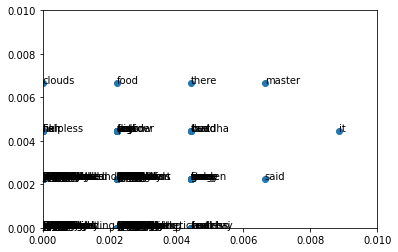

In [ ]:
dtm_T.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
plt.scatter(dtm_T.Google, dtm_T.Chatgpt)
plt.xlim(0, 0.010)
plt.ylim(0, 0.010)

for i, txt in enumerate(dtm_T.words):
    ax.annotate(txt, (dtm_T.Google[i], dtm_T.Chatgpt[i]))

In [ ]:
# Statistical test of association


In [ ]:
# Correlation pearson
new = new_df.transpose()
new.corr(method='pearson')

translation,Google translate.txt,chatgpt.txt,formal English translation.txt
translation,,,
Google translate.txt,1.000000,0.118416,-0.037665
chatgpt.txt,0.118416,1.000000,0.027152
formal English translation.txt,-0.037665,0.027152,1.000000


After removing stop-words and with stemmed words, the correlation coefficient between Google and Chagpt is 0.12, the correlation coefficient between Google and formal translation is -0.04, the correlation coefficient between Chatgpt and formal translation is 0.03. Google and Chatgpt's translation is more simialr to each other than to the formal translation.  


In [ ]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(new.T)


array([[1.        , 0.55770881, 0.49569602],
       [0.55770881, 1.        , 0.52879282],
       [0.49569602, 0.52879282, 1.        ]])

After removing stop-words and with stemmed words, the cosine similarity between Google and Chagpt is 0.56, the cosine similarity between Google and formal translation is 0.50, the cosine similarity between formal translation and Chagpt is 0.53. Cosine similarity reflects a similar pattern as Pearson r. Google and Chatgpt translation are more similar to each other than to the formal translation.

In [ ]:
#Chi-sq test of Google and formal translation
dtm_cont = pd.crosstab(new['Google translate.txt'], new['formal English translation.txt'])
chi2_stat, p_val, dof, ex = sp.stats.chi2_contingency(dtm_cont.values)
chi2_stat, p_val

(154.83747921089224, 1.917743561008937e-29)

After removing stop-words and with stemmed words, the chi-squared test suggests that Google and formal translation are distinct(super small p-value anf large chi-squared value).

In [ ]:
#Chi-sq test of Chatgpt and formal translation
dtm_cont = pd.crosstab(new['chatgpt.txt'], new['formal English translation.txt'])
chi2_stat, p_val, dof, ex = sp.stats.chi2_contingency(dtm_cont.values)
chi2_stat, p_val

(53.212726469972125, 1.063068249484377e-09)

After removing stop-words and with stemmed words, the chi-squared test suggests that Chatgpt and formal translation are distinct (super small p-value anf large chi-squared value).

In [ ]:
#Chi-sq test of Google and Chatgpt
dtm_cont = pd.crosstab(new['Google translate.txt'], new['chatgpt.txt'])
chi2_stat, p_val, dof, ex = sp.stats.chi2_contingency(dtm_cont.values)
chi2_stat, p_val

(163.53526775205665, 9.989378755372222e-29)

Even though Pearson r suggests that Chatgpt and Google translation are similar to each other than to the formal translation. After removing stop-words and with stemmed words, the chi-squared test suggests that Chatgpt and formal translation are distinct (super small p-value anf large chi-squared value).

In [ ]:
# Regression models
dtm_T2 = dtm_T.drop(["formal English translation.txt"], axis = 1)
dtm_T2 = dtm_T.rename(columns={'Google translate.txt': 'Google', 'chatgpt.txt': 'Chatgpt'})

from statsmodels.regression.linear_model import OLS

m1a = OLS.from_formula('Google ~ Chatgpt', data=dtm_T2).fit()
m1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Google   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     11.14
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           0.000887
Time:                        14:21:02   Log-Likelihood:                -680.22
No. Observations:                 785   AIC:                             1364.
Df Residuals:                     783   BIC:                             1374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5072      0.029     17.437      0.000       0.450       0.564
Chatgpt        0.1197      0.036      3.337      0.001       0.049       0.190
==============================================================================
Omnibus:                       44.066   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.969
Skew:                           0.554   Prob(JB):                     5.19e-12
Kurtosis:                       3.600   Cond. No.                         2.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On average, knowing which words Chatgpt used frequently helps us to predict Google's words with up to 1.4% more accuracy.

In [ ]:
# Sentiment analysis

from textblob import TextBlob
for d in ppwords:
    d = TextBlob(d)
    print(d.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


Through sentiment analysis, I want to check whether the word selection of Chatgpt and Google translation properly pass on the level of polarity in the original text.

The word choice of all types of translation is neutral. This is reasonable because the selected section of text is not emotional rich at all, and contains more descriptions from the story teller's perspective (3rd person). It is a good thing that both Chatgpt and Google didn't add any polarity to the story.   

In [ ]:
files = ['Google translate.txt', 'chatgpt.txt', 'formal English translation.txt']
paper_words = {}

for d in files:
    file_path = '/content/' + str(d)
    with open(file_path, 'rb') as f:
        f = [f.read().decode('latin8', 'ignore')]
        #f = [f.read().decode('utf8', 'ignore').replace('\r\n', " ").replace('\ufeff', '')]
        paper_words[d] = f

(-0.5, 399.5, 199.5, -0.5)

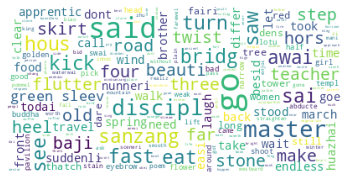

In [ ]:
# Wordclouds
from shorttext.utils import standard_text_preprocessor_1
preprocessor1 = standard_text_preprocessor_1()

# get corpus into the right format to be preprocessed
docids = sorted(paper_words.keys())
addresses = [a for docid in docids for a in paper_words[docid]]

# apply preprocessing
corpus = [preprocessor1(a).split(' ') for a in addresses]

# remove empty characters
corpus = [[w for w in d if w not in ['', '\n', '\r\n', '\ufeff']] for d in corpus]

from wordcloud import WordCloud
Google = ' '.join(corpus[0])
m_wordcloud = WordCloud(background_color="white", max_font_size=40).generate(Google)
plt.imshow(m_wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

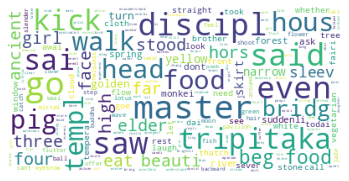

In [ ]:
Chatgpt = ' '.join(corpus[1])
m_wordcloud = WordCloud(background_color="white", max_font_size=40).generate(Chatgpt)
plt.imshow(m_wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

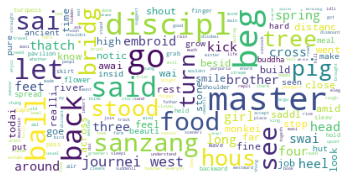

In [ ]:
Formal = ' '.join(corpus[2])
m_wordcloud = WordCloud(background_color="white", max_font_size=40).generate(Formal)
plt.imshow(m_wordcloud)
plt.axis("off")

In [ ]:
ppwords_t = ppwords.T
ppwords_t.reset_index(drop=False, inplace=True)
ppwords_t.rename(columns={'index': 'words'}, inplace=True)


In [ ]:
ppwords['Google'] = ppwords['Google translate.txt'].apply(lambda x: x/ppwords['Google translate.txt'].sum())
ppwords['chatgpt.txt'] = ppwords['chatgpt.txt'].apply(lambda x: x/ppwords['chatgpt.txt'].sum())

ppwords['Google_over_chatgpt'] = ppwords.Google.txt - ppwords.chatgpt.txt
dtm_T['Obama_prop'] = dtm_T['Obama.Inaug.2009'].apply(lambda x: x/dtm_T['Obama.Inaug.2009'].sum())
dtm_T['Trump_prop'] = dtm_T['Trump.Inaug.2017'].apply(lambda x: x/dtm_T['Trump.Inaug.2017'].sum())

dtm_T['Obama_over_Trump'] = dtm_T.Obama_prop - dtm_T.Trump_prop

KeyError: ignored

3. Generate relative word frequencies for each bag of words, and compare them to each other.

In [ ]:
pip install textmining3

In [ ]:
!pip install shorttext

In [ ]:
from shorttext.utils import standard_text_preprocessor_1
preprocessor1 = standard_text_preprocessor_1()
docids = sorted(processed_paper_words.keys())
print(docids)
addresses = [a for docid in docids for a in processed_paper_words[docid]]
corpus = [preprocessor1(a).split(' ') for a in addresses]
corpus = [[w for w in d if w not in ['', '\n', '\r\n', '\ufeff']] for d in corpus]

from shorttext.utils import DocumentTermMatrix
dtm = DocumentTermMatrix(corpus)
dtm_df = DocumentTermMatrix.generate_dtm_dataframe(corpus)
dtm_df.index = docids
dtm_df.head(10)

In [ ]:
dtm_T_freq = dtm_df.T
dtm_T_freq['A3SR'] = dtm_T_freq['A3SR'].apply(lambda x: x/dtm_T_freq['A3SR'].sum())
dtm_T_freq['AQR'] = dtm_T_freq['AQR'].apply(lambda x: x/dtm_T_freq['AQR'].sum())
dtm_T_freq['QMSS'] = dtm_T_freq['QMSS'].apply(lambda x: x/dtm_T_freq['QMSS'].sum())

dtm_T_freq.head()

In [ ]:
nltk.download("stopwords")
stop_words = list(stopwords.words('english'))
for word in paperwords: # iterate over word_list
  if word[2] in stop_words:
    paperwords.remove(word) # remove word from paperwords if it is a stopword

In [ ]:
len(paperwords)

In [ ]:
ppwords = pd.DataFrame(paperwords, columns = ['type_of_translation', 'line', 'word'])